In [2]:
from sys import argv
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.metrics import RocCurveDisplay, accuracy_score, confusion_matrix, PrecisionRecallDisplay, ConfusionMatrixDisplay, make_scorer, precision_score,recall_score
from sklearn.model_selection import train_test_split, LeavePGroupsOut,cross_val_score,cross_validate
complete_features=[
        "AF1",
        "AF2",
        "AF3",
        "AF4",
        "AF5",
        "BLOSUM1",
        "BLOSUM2",
        "BLOSUM3",
        "BLOSUM4",
        "BLOSUM5",
        "BLOSUM6",
        "BLOSUM7",
        "BLOSUM8",
        "BLOSUM9",
        "BLOSUM10",
        "PP1",
        "PP2",
        "PP3",
        "F1",
        "F2",
        "F3",
        "F4",
        "F5",
        "F6",
        "KF1",
        "KF2",
        "KF3",
        "KF4",
        "KF5",
        "KF6",
        "KF7",
        "KF8",
        "KF9",
        "KF10",
        "MSWHIM1",
        "MSWHIM2",
        "MSWHIM3",
        "E1",
        "E2",
        "E3",
        "E4",
        "E5",
        "PD1",
        "PD2",
        "PRIN1",
        "PRIN2",
        "PRIN3",
        "ProtFP1",
        "ProtFP2",
        "ProtFP3",
        "ProtFP4",
        "ProtFP5",
        "ProtFP6",
        "ProtFP7",
        "ProtFP8",
        "SV1",
        "SV2",
        "SV3",
        "SV4",
        "ST1",
        "ST2",
        "ST3",
        "ST4",
        "ST5",
        "ST6",
        "ST7",
        "ST8",
        "SVGER1",
        "SVGER2",
        "SVGER3",
        "SVGER4",
        "SVGER5",
        "SVGER6",
        "SVGER7",
        "SVGER8",
        "SVGER9",
        "SVGER10",
        "SVGER11",
        "T1",
        "T2",
        "T3",
        "T4",
        "T5",
        "VHSE1",
        "VHSE2",
        "VHSE3",
        "VHSE4",
        "VHSE5",
        "VHSE6",
        "VHSE7",
        "VHSE8",
        "VSTPV1",
        "VSTPV2",
        "VSTPV3",
        "VSTPV4",
        "VSTPV5",
        "VSTPV6",
        "Z1",
        "Z2",
        "Z3",
        "Z4",
        "Z5",
        "cys30",
        "cys20",
        "cys_ser30",
        "cys_ser20",
        "charge",
        "avgcharge",
        "avghydrop",
        "length",
        "entropy",
        "entropyratio",
        "boman",
        "instability",
        "aliphatic",
        "A",
        "R",
        "N",
        "D",
        "C",
        "E",
        "Q",
        "G",
        "H",
        "I",
        "L",
        "K",
        "M",
        "F",
        "P",
        "S",
        "T",
        "W",
        "Y",
        "V",
        "RHK",
        "DE",
        "STNQ",
        "CGP",
        "AVIL",
        "MFYW",
    ]
original_features=[
        "cys30",
        "cys20",
        "cys_ser30",
        "cys_ser20",
        "charge",
        "avgcharge",
        "avghydrop",
        "length",
        "entropy",
        "entropyratio",
        "boman",
        "instability",
        "aliphatic",
        "A",
        "R",
        "N",
        "D",
        "C",
        "E",
        "Q",
        "G",
        "H",
        "I",
        "L",
        "K",
        "M",
        "F",
        "P",
        "S",
        "T",
        "W",
        "Y",
        "V",
        "RHK",
        "DE",
        "STNQ",
        "CGP",
        "AVIL",
        "MFYW"
    ]
feature_selection=['RHK','R','H','K','avghydrop','length','BLOSUM7','PP2','F3','F6','MSWHIM3','E4','PD1','PRIN3','ProtFP5','SV3','SV4','ST7','T3','VHSE5',"cys30",
        "cys20",
        "cys_ser30",
        "cys_ser20",
        "charge",
        "avgcharge"]

ripp_classes=['Guanidinotide',
              'Cyanobactin',
              'Thiopeptide',
              'TBA', 
              'Pearlin',
              'Ryptide',
              'Glycocin', 
              'Borosin',
              'Microcin', 
              'Head-to-tail cyclized peptide',
              'Pantocin', 
              'other',
              'Bottromycin',
              'Mycofactocin',
              'Cyptide', 
              'Streptide', 
              'Epipeptide', 
              'Dikaritin',
              'Proteusin', 
              'Rotapeptide',
              'Microviridin', 
              'Methanobactin', 
              'Ranthipeptide', 
              'Thioamitide',
              'Amatoxin',
              'Cyclotide',
              'Sulfatyrotide',
              'AIP',
              'Selidamide',
              'Graspetide', 
              'Crocagin', 
              'N-Formylated TBA', 
              'Linear azole-containing peptide', 
              'Lanthipeptide',
              'Lasso', 
              'Sactipeptide',
              'Bacteriocin', 
              'Lyciumin',
              'Linaridin']

39


In [4]:
def class_split_iterable(dataset,class_list):
    custom_cv=[]
    for category in class_list:
        positive_indices=dataset[dataset['Class'].str.contains(category, na=False)].index.tolist()
        negative_indices = dataset[dataset['Class'].str.contains('No_RiPP', na=False)].index.tolist()
        sample_size = min(len(positive_indices)*40, len(negative_indices))  # Handle cases with fewer matches
        random_indices = random.sample(negative_indices, sample_size)
        validation_indices=positive_indices+random_indices
        all_indices = dataset.index.tolist()
        training_indices = list(set(all_indices) - set(validation_indices))
        training_indices.sort()
        validation_indices.sort()
        custom_cv.append((tuple(training_indices),tuple(validation_indices)))
    return custom_cv

def svm_training_split(dataset_file,feature_list):
    dataset = pd.read_csv(dataset_file)
    dataset = dataset.drop(labels="sequence", axis=1)
    x = dataset[feature_list]
    y = dataset[["RiPP"]].to_numpy().ravel()
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2,random_state=42)
    return x_train, x_test, y_train, y_test

def x_and_y(dataset,feature_list):
    dataset = dataset.drop(labels=["sequence","Class"], axis=1)
    x = dataset[feature_list]
    y = dataset[["RiPP"]].to_numpy().ravel()
    return x,y

def f_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp, names, strict=False)), strict=False)
    fig=plt.figure(figsize=(5,5),dpi=300)
    plt.barh(range(len(names)), imp, align="center")
    plt.yticks(range(len(names)), names, fontsize=3)
    plt.title('Feature coefficients')
    plt.show()
    
def svc_classification(x_train, x_test, y_train, y_test,feature_list):
    linear_svc = svm.SVC(kernel="linear",random_state=0,class_weight='balanced',verbose=True)
    linear_svc.fit(x_train, y_train)
    f_importances(abs(linear_svc.coef_[0]),feature_list)
    y_pred = linear_svc.predict(x_test)
    print(
        pd.DataFrame(
            confusion_matrix(y_test, y_pred),
            index=linear_svc.classes_,
            columns=linear_svc.classes_,
        )
    )
    ax = plt.gca()
    RocCurveDisplay.from_estimator(
        linear_svc, x_test, y_test, name="Validation data", ax=ax, alpha=0.8
    )
    RocCurveDisplay.from_estimator(linear_svc,x_train,y_train,name='Training data', ax=ax,alpha=0.8)
    plt.show()
    
    ax=plt.gca()
    PrecisionRecallDisplay.from_estimator(linear_svc,x_test,y_test,name='Validation data',ax=ax, alpha=0.8)
    PrecisionRecallDisplay.from_estimator(linear_svc,x_train,y_train,name='Training data',ax=ax, alpha=0.8)
    plt.show()
    
    plt.style.use('default')
    ConfusionMatrixDisplay.from_estimator(linear_svc,x_test,y_test)
    plt.show()
    
def svc_loco(svm, dataset, custom_cv,feature_list):
    x,y=x_and_y(dataset,feature_list)
    print(custom_cv[1][1])
    print(len(custom_cv[1][0]))
    scoring_metrics = {
    'accuracy': 'accuracy',  # Predefined scorer
    'precision': make_scorer(precision_score, pos_label='RiPP'),
    'recall': make_scorer(recall_score, pos_label='RiPP'),
    'f1_macro': 'f1_macro',  # Predefined scorer
    'roc_auc': 'roc_auc'  # Predefined scorer
}
    scores =cross_validate(svm, x, y, cv=custom_cv, scoring=scoring_metrics)
    plt.figure(figsize=(10, 6))
    for metric, values in scores.items():
        plt.plot(range(1, len(values) + 1), values, label=f'{metric.capitalize()}', marker='o')
    plt.title('Cross-Validation Scores for Different Metrics', fontsize=14)
    plt.xlabel('Fold', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

In [18]:
dataset= pd.read_csv('/lustre/BIF/nobackup/sanz006/training_dataset.csv')
x,y=x_and_y(dataset,complete_features)
linear_svc = svm.SVC(kernel="linear",random_state=0,class_weight='balanced')
my_cv=class_split_iterable(dataset,ripp_classes)
scoring_metrics = {
    'accuracy': 'accuracy',  # Predefined scorer
    'precision': make_scorer(precision_score, pos_label='RiPP'),
    'recall': make_scorer(recall_score, pos_label='RiPP'),
    'f1_macro': 'f1_macro',  # Predefined scorer
    'roc_auc': 'roc_auc'  # Predefined scorer
}
scores=cross_validate(linear_svc, x, y, cv=[my_cv], scoring=scoring_metrics,n_jobs=10,verbose=2)
print(scores)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


ValueError: too many values to unpack (expected 2)

In [22]:
dataset= pd.read_csv('/lustre/BIF/nobackup/sanz006/training_dataset.csv')
linear_svc = svm.SVC(kernel="linear",random_state=0,class_weight='balanced')
my_cv=class_split_iterable(dataset,ripp_classes)
svc_loco(linear_svc,dataset,my_cv,complete_features)



(3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 189, 190, 191, 227, 247, 290, 348, 349, 366, 416, 422, 507, 527, 536, 549, 553, 568, 571, 610, 636, 729, 750, 766, 789, 819, 842, 845, 851, 891, 921, 925, 930, 933, 986, 1017, 1026, 1093, 1104, 1106, 1118, 1127, 1157, 1210, 1226, 1236, 1242, 1254, 1268, 1276, 1283, 1318, 1322, 1329, 1340, 1353, 1364, 1366, 1385, 1391, 1411, 1439, 1481, 1516, 1519, 1520, 1540, 1589, 1592, 1638, 1695, 1705, 1737, 1747, 1774, 1786, 1851, 1867, 1883, 1892, 1901, 1986, 2038, 2084, 2091, 2101, 2120, 2153, 2164, 2169, 2173, 2178, 2207, 2226, 2236, 2275, 2335, 2347, 2357, 2358, 2363, 2365, 2375, 2395, 2445, 2513, 2519, 2550, 2552, 2561, 2565, 2587, 2610, 2614, 2620, 2654, 2657, 2663, 2717, 2771, 2783, 2786, 2796, 2799, 2961, 2985, 3022, 3031, 3044, 3056, 3101, 3119, 3120, 3128, 3137, 3192, 3249, 3256, 3276, 3308, 3379, 3428, 3483, 3505, 3507, 3526, 3534, 3554, 3576, 3603, 3615, 3652, 3672, 3680, 3710, 3774, 3780, 3821, 3866, 3909, 3951, 3957, 3959, 4027, 4035, 4083, 4095, 

ValueError: too many values to unpack (expected 2)

Plotting feature importance of each feature:

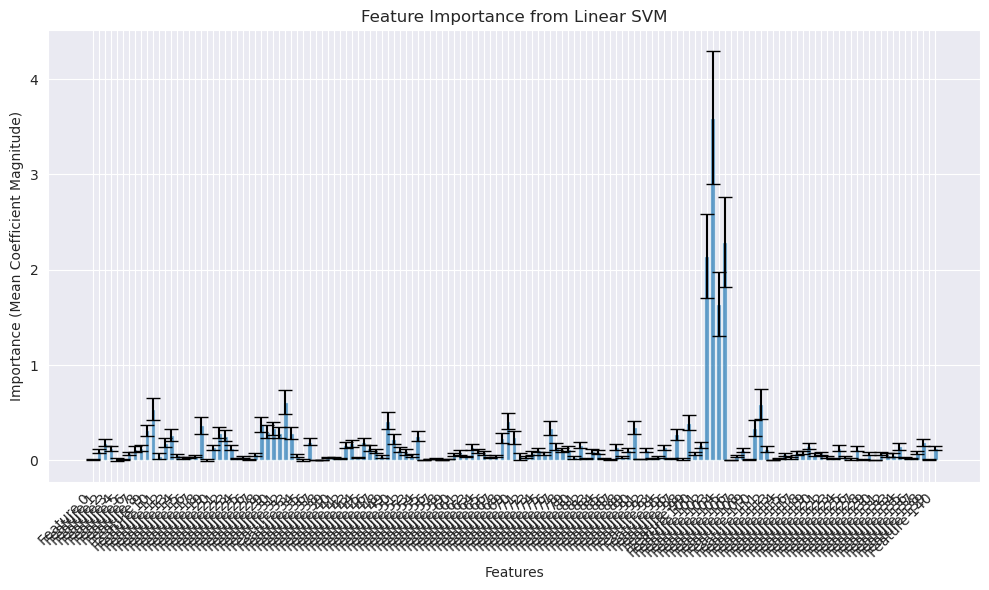

In [8]:
# Create a linear SVM
dataset= pd.read_csv('/lustre/BIF/nobackup/sanz006/training_dataset.csv')
linear_svm = svm.SVC(kernel='linear')

# Define cross-validation strategy
x,y=x_and_y(dataset,complete_features)
my_cv=class_split_iterable(dataset,ripp_classes)

# Placeholder to store feature coefficients for each fold
coefficients = []

# Perform cross-validation
for train_idx, test_idx in my_cv:
    # Split data
    X_train, X_test = x.loc[list(train_idx)], x.loc[list(test_idx)]
    y_train, y_test = y[list(train_idx)], y[list(test_idx)]
    
    # Fit model
    linear_svm.fit(X_train, y_train)
    
    # Store coefficients (absolute value for importance)
    coefficients.append(np.abs(linear_svm.coef_[0]))

# Convert coefficients to a NumPy array
coefficients = np.array(coefficients)

# Mean importance across folds
mean_importance = coefficients.mean(axis=0)

# Standard deviation for variability
std_importance = coefficients.std(axis=0)

# Plot feature importance
feature_names = [f'{complete_features[i]}' for i in range(x.shape[1])]

plt.figure(figsize=(10, 6))
plt.bar(range(x.shape[1]), mean_importance, yerr=std_importance, align='center', alpha=0.7, capsize=5)
plt.xticks(range(x.shape[1]), feature_names, rotation=45, ha='right')
plt.title('Feature Importance from Linear SVM')
plt.xlabel('Features')
plt.ylabel('Importance (Mean Coefficient Magnitude)')
plt.tight_layout()
plt.show()

Too many values, selecting top 30 features:

(30,)
(30,)
(30,)


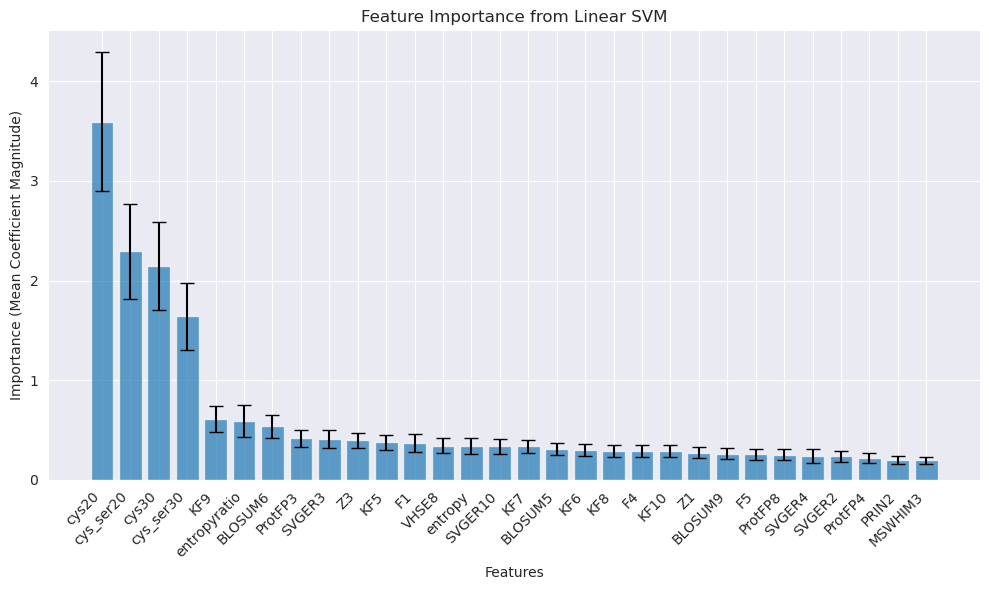

In [13]:
importance_df=pd.DataFrame({'Importance mean':mean_importance,'Importance_std':std_importance,'feature_label':complete_features})
feature_names = [f'{complete_features[i]}' for i in range(x.shape[1])]
top_30 = importance_df.sort_values(by='Importance mean', ascending=False).head(30)

big_imp=top_30['Importance mean']
big_std=top_30['Importance_std']
big_label=top_30['feature_label']
plt.figure(figsize=(10, 6))
plt.bar(range(30), big_imp, yerr=big_std, align='center', alpha=0.7, capsize=5)
plt.xticks(range(30), big_label, rotation=45, ha='right')
plt.title('Feature Importance from Linear SVM')
plt.xlabel('Features')
plt.ylabel('Importance (Mean Coefficient Magnitude)')
plt.tight_layout()
plt.show()

Same dataset but using the original features + Boman, aliphatic and instability

[LibSVM]................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

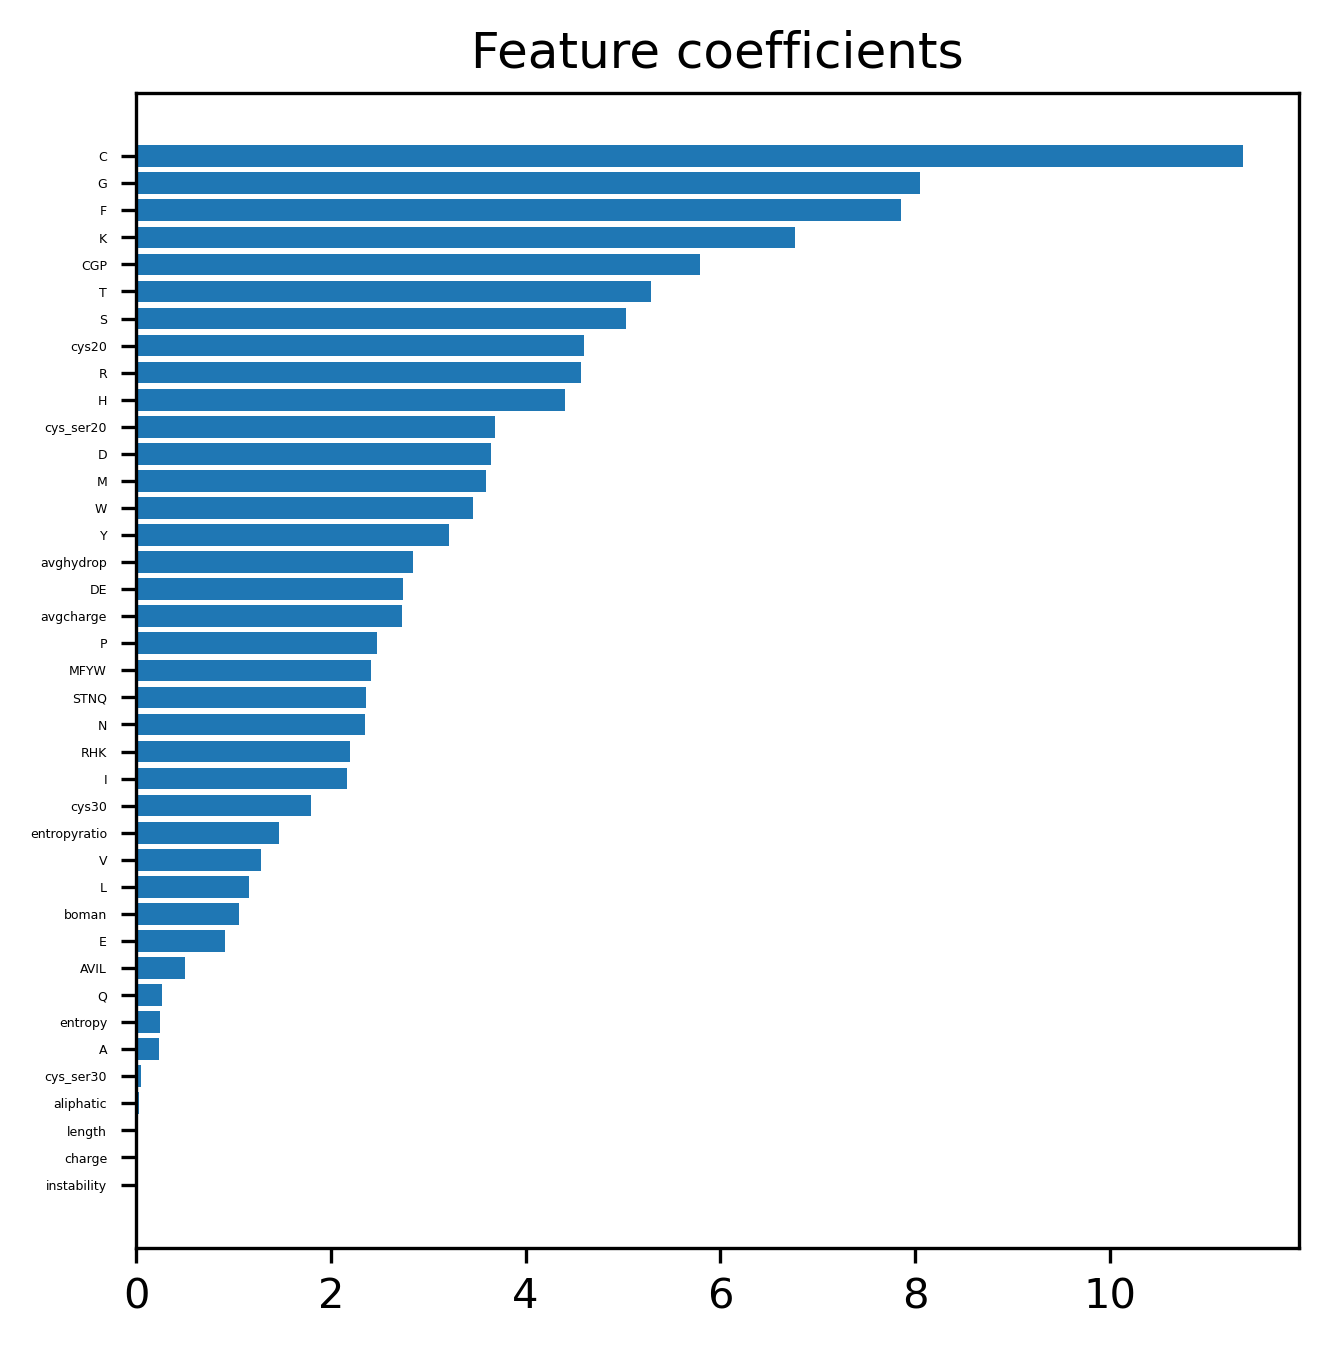

         No_RiPP  RiPP
No_RiPP     3560   441
RiPP          14    86


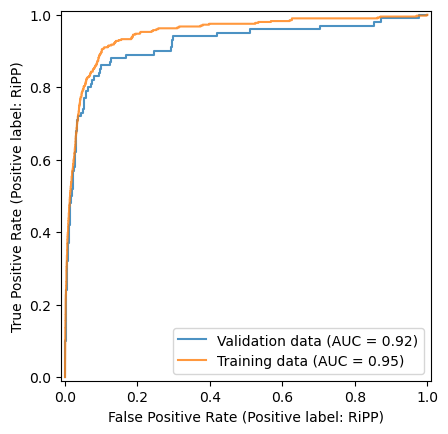

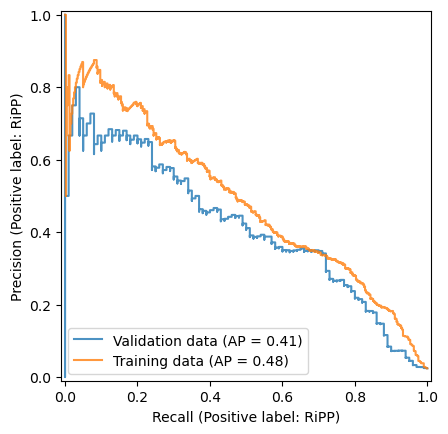

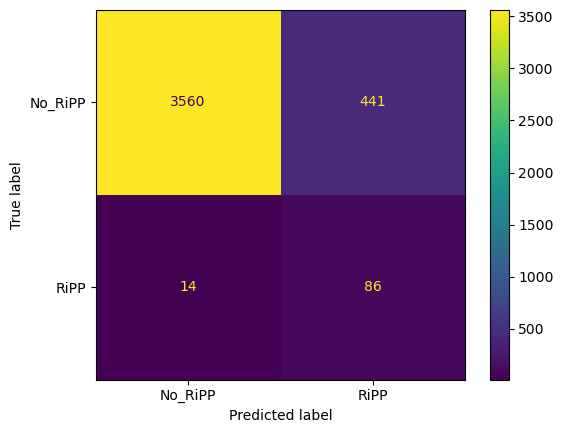

In [4]:
x_train, x_test, y_train, y_test = svm_training_split('/lustre/BIF/nobackup/sanz006/training_dataset.csv',feature_list=original_features)
svc_classification(x_train, x_test, y_train, y_test,feature_list=original_features)

Next cells will make an attempt to determine whether the increase in our dataset (500 proteins) vs the original paper (137 proteins) has had a positive effect

In [5]:
def svm_training_split_reduced(dataset_file,feature_list):
    dataset = pd.read_csv(dataset_file)
    dataset = dataset.drop(labels="sequence", axis=1)
    dataset=dataset.iloc[364:]
    x = dataset[feature_list]
    y = dataset[["RiPP"]].to_numpy().ravel()
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2,random_state=42)
    return x_train, x_test, y_train, y_test

[LibSVM]................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

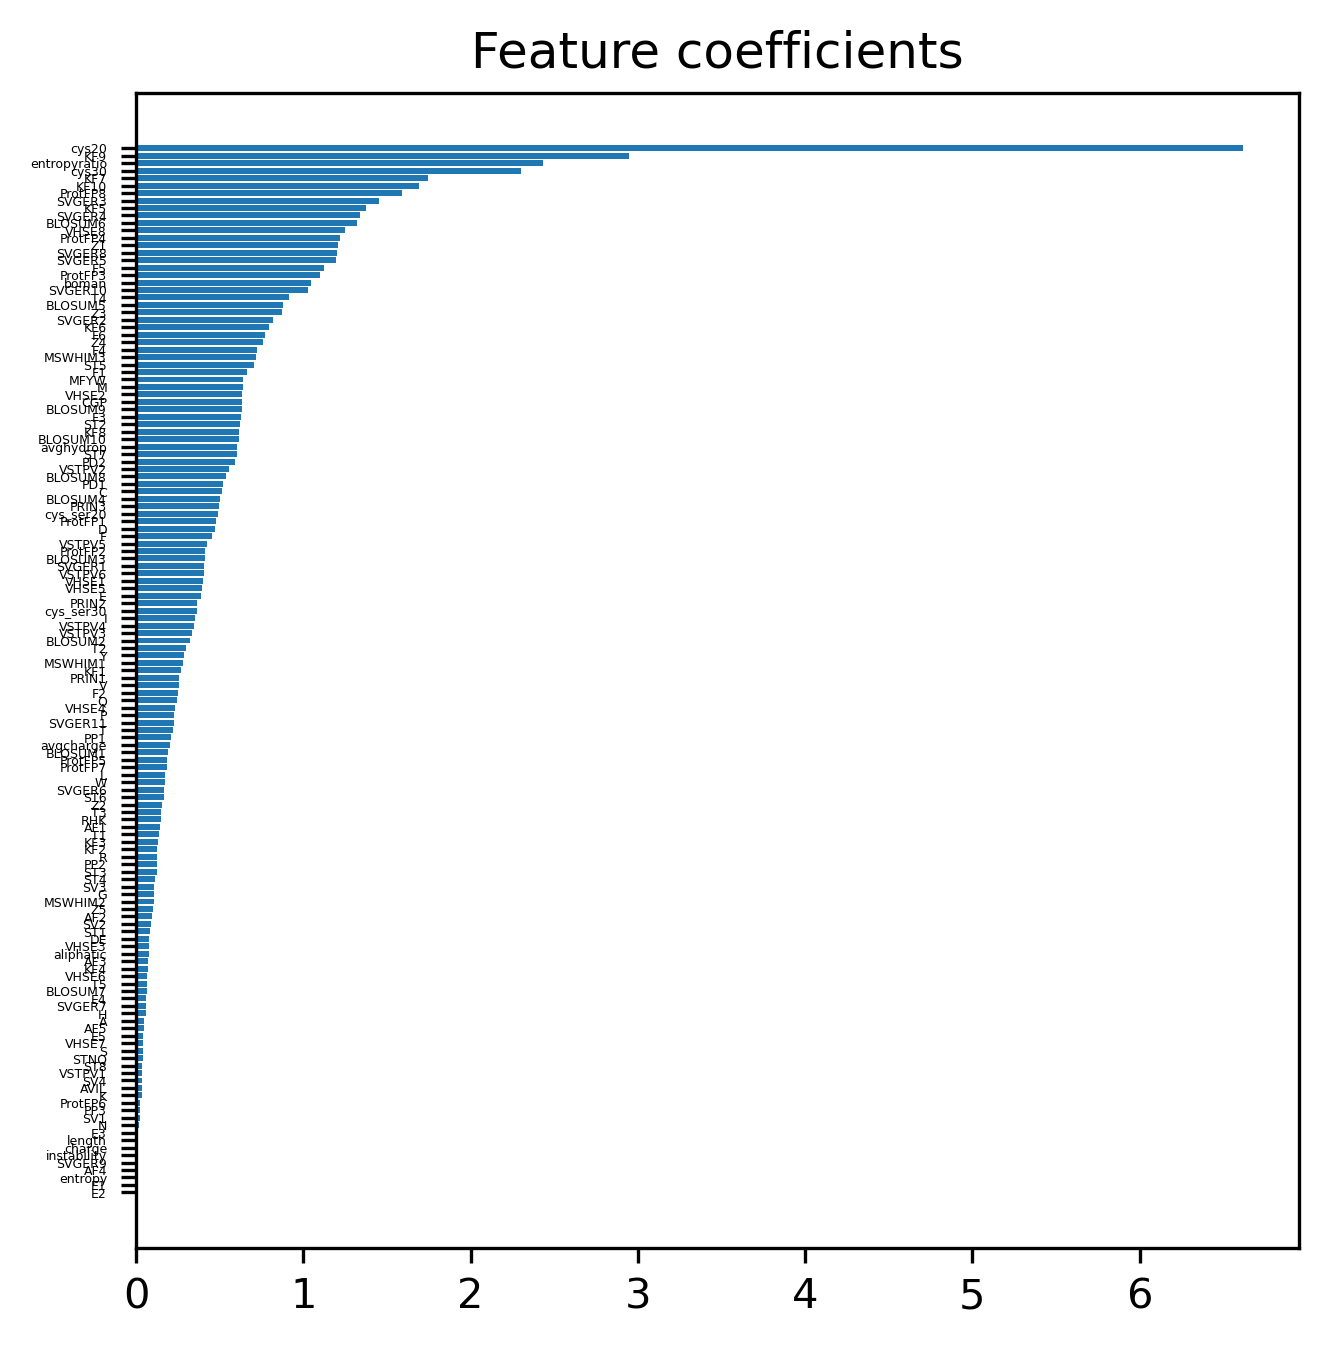

         No_RiPP  RiPP
No_RiPP     3578   423
RiPP           8    19


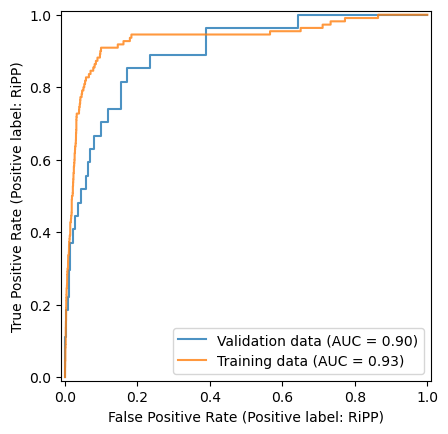

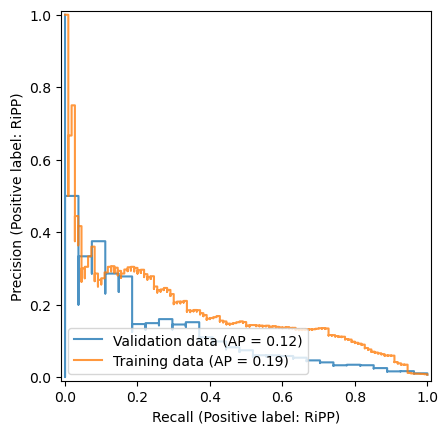

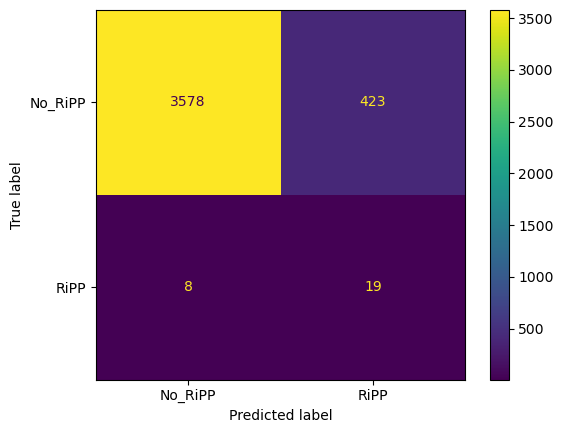

In [6]:
x_train, x_test, y_train, y_test = svm_training_split_reduced('/lustre/BIF/nobackup/sanz006/training_dataset.csv',feature_list=complete_features)
svc_classification(x_train, x_test, y_train, y_test,feature_list=complete_features)

[LibSVM]................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

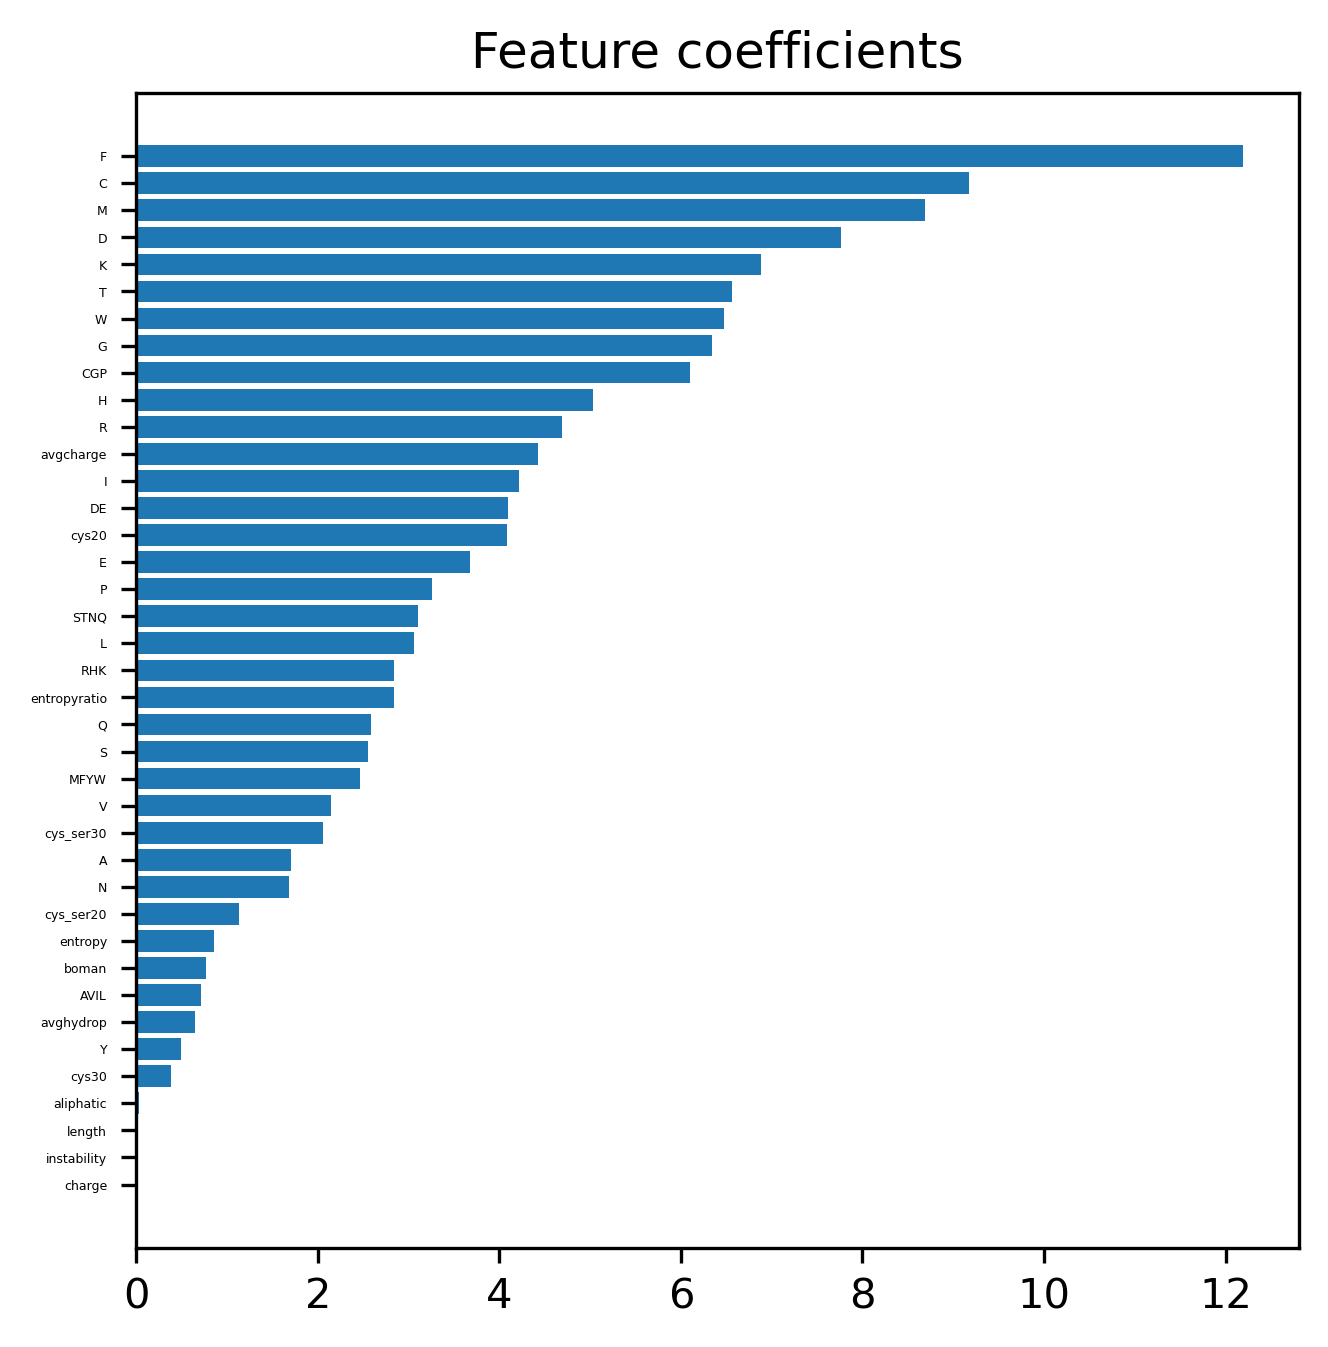

         No_RiPP  RiPP
No_RiPP     3529   472
RiPP           7    20


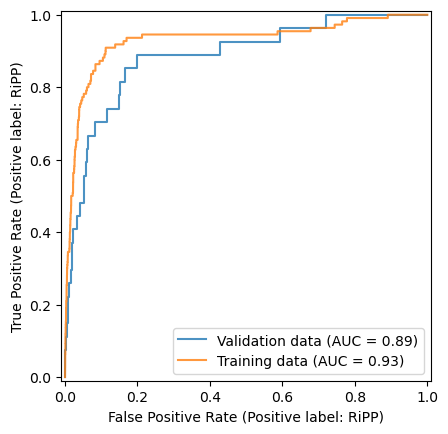

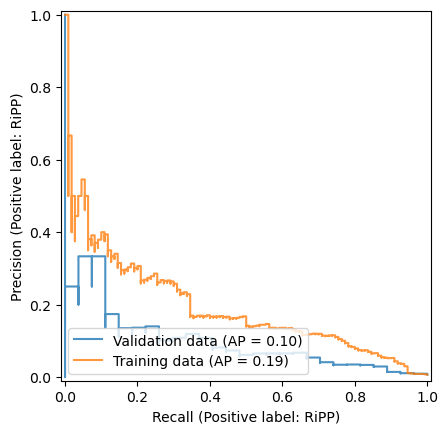

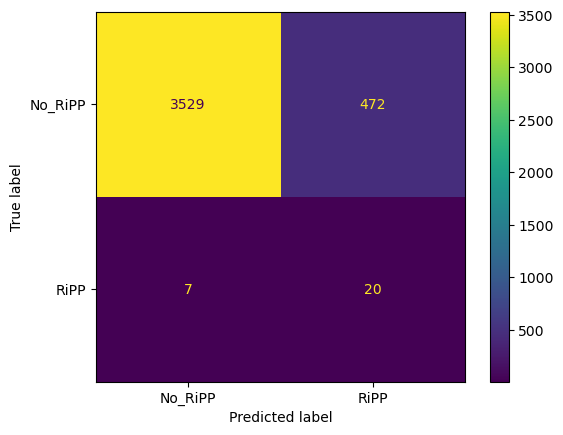

In [7]:
x_train, x_test, y_train, y_test = svm_training_split_reduced('/lustre/BIF/nobackup/sanz006/training_dataset.csv',feature_list=original_features)
svc_classification(x_train, x_test, y_train, y_test,feature_list=original_features)

Now we will use fewer features based on the feature importance plots

[LibSVM]................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

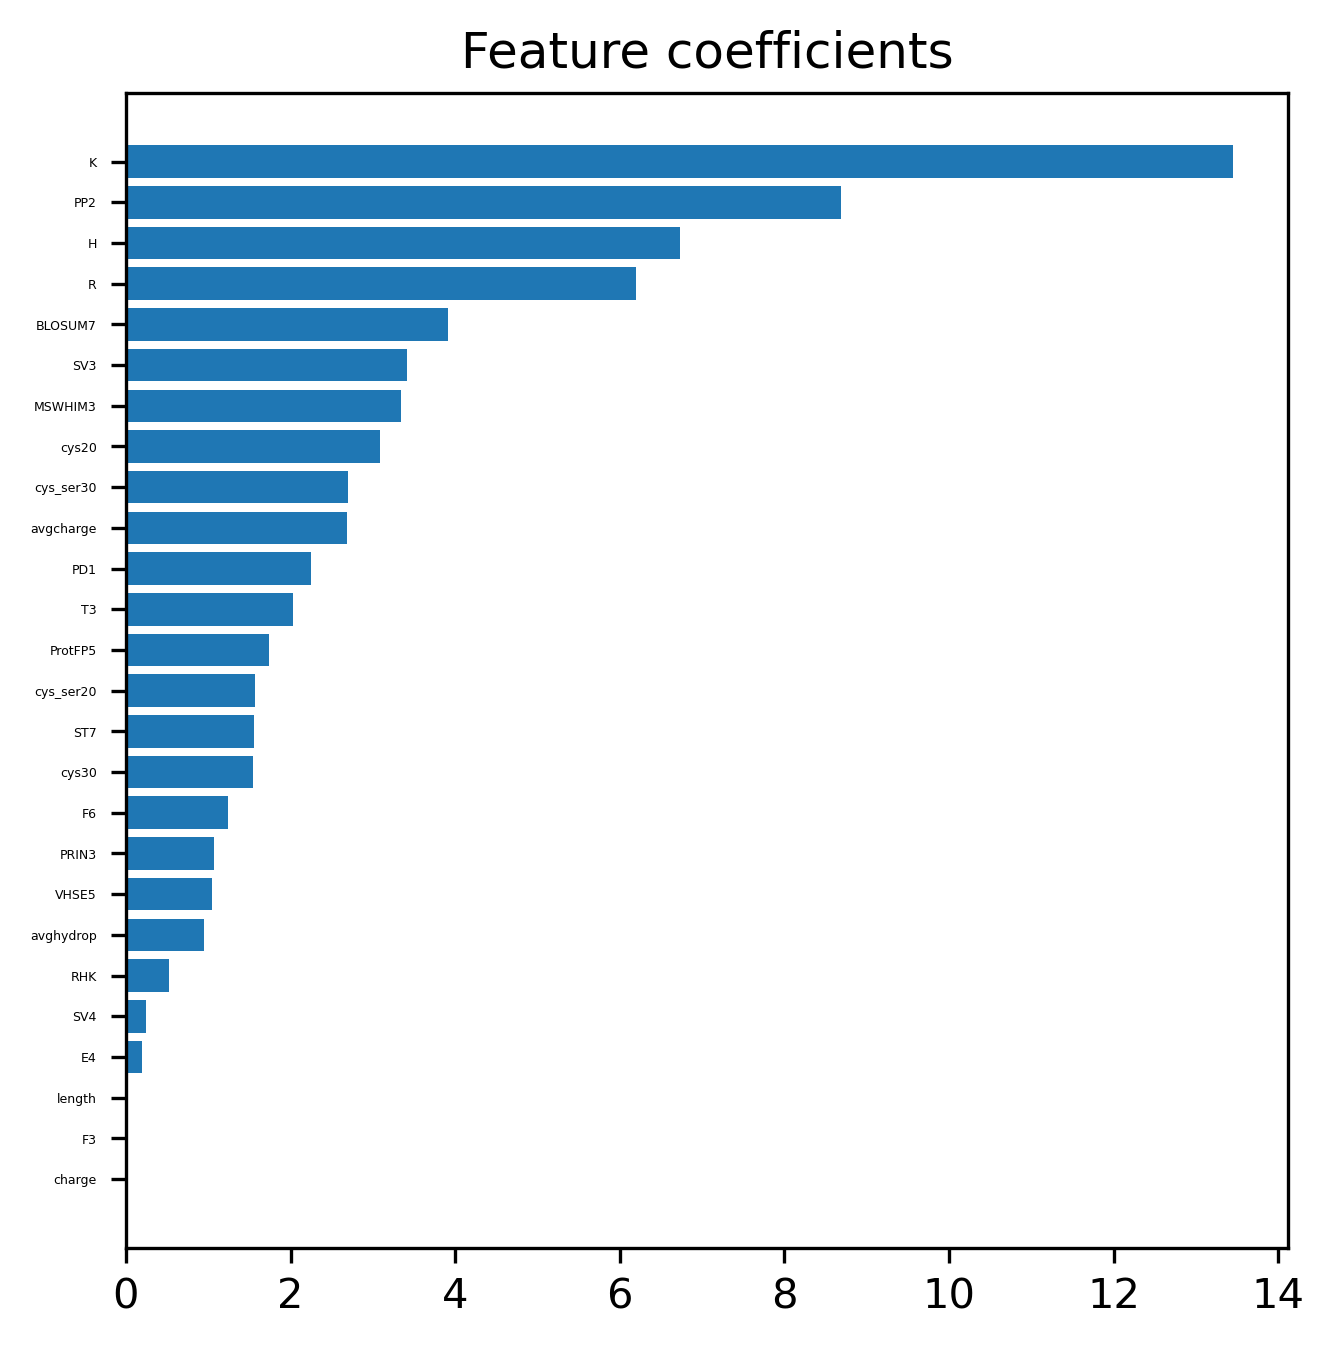

         No_RiPP  RiPP
No_RiPP     3431   570
RiPP          16    84


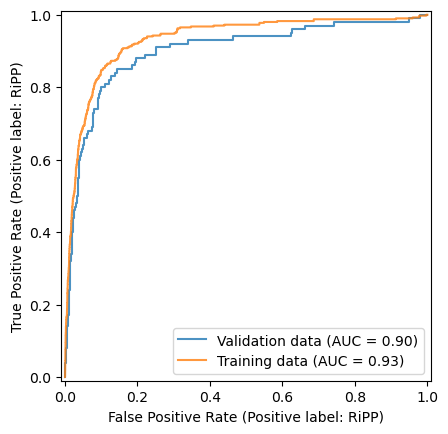

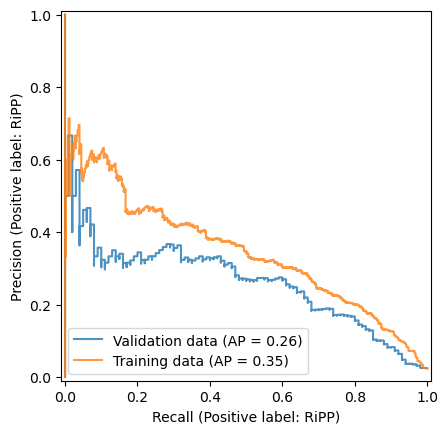

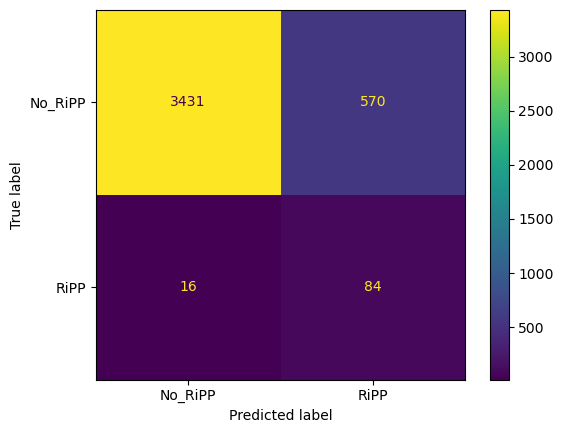

In [8]:
x_train, x_test, y_train, y_test = svm_training_split('/lustre/BIF/nobackup/sanz006/training_dataset.csv',feature_list=feature_selection)
svc_classification(x_train, x_test, y_train, y_test,feature_list=feature_selection)